In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import re
import nltk
nltk.download('wordnet')  # WordNet is used for lemmatization
nltk.download('omw-1.4')  # This is needed for WordNet in some setups
nltk.download('stopwords')  # For stopword removal
nltk.download('punkt_tab') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import fisher_exact

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\owlzh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\owlzh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owlzh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\owlzh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Ease of Use

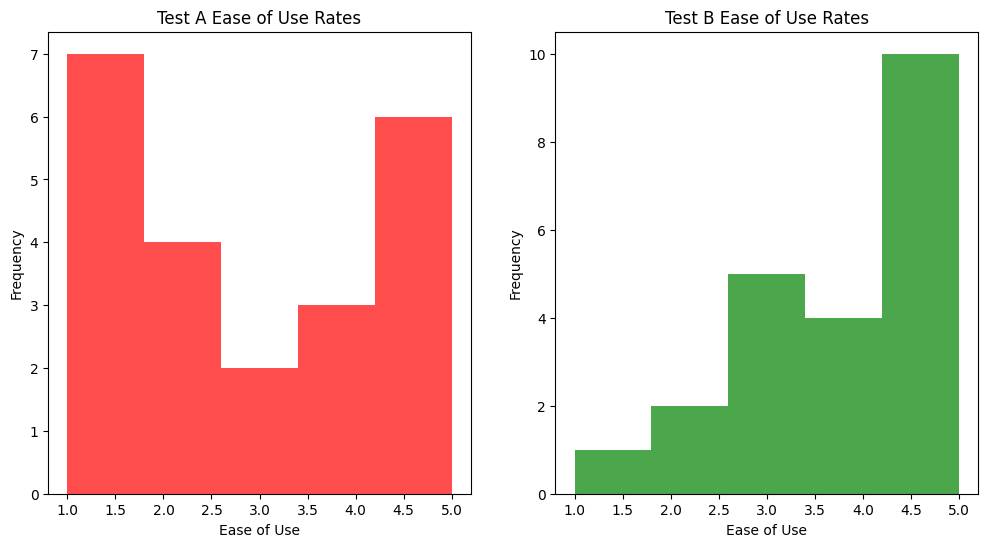

In [ ]:
#Ease of use rate raw data

# Data
easeOfUse_a = [5, 1, 5, 1, 1, 5, 2, 1, 5, 3, 4, 1, 1, 4, 5, 4, 5, 2, 2, 1, 2, 3]
easeOfUse_b = [3, 4, 3, 5, 5, 4, 3, 2, 3, 5, 3, 5, 5, 4, 5, 2, 5, 1, 4, 5, 5, 5]

pre_change = np.array(easeOfUse_a)
post_change = np.array(easeOfUse_b)

# Create subplots (2 histograms in one figure)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pre-change histogram
axes[0].hist(pre_change, bins=5, alpha=0.7, color='red')
axes[0].set_title('Test A Ease of Use Rates')
axes[0].set_xlabel('Ease of Use')
axes[0].set_ylabel('Frequency')

# Plot the post-change histogram
axes[1].hist(post_change, bins=5, alpha=0.7, color='green')
axes[1].set_title('Test B Ease of Use Rates')
axes[1].set_xlabel('Ease of Use')
axes[1].set_ylabel('Frequency')

# Show the plot
plt.show()

In [3]:
# Shapiro-Wilk test for normality
stat_a, p_a = stats.shapiro(easeOfUse_a)
stat_b, p_b = stats.shapiro(easeOfUse_b)

print(f"Test A - Shapiro-Wilk test: Statistic = {stat_a}, p-value = {p_a}")
print(f"Test B - Shapiro-Wilk test: Statistic = {stat_b}, p-value = {p_b}")

# Interpret the result
alpha = 0.05
if p_a < alpha:
    print("Test A data is not normally distributed")
else:
    print("Test A data is normally distributed")

if p_b < alpha:
    print("Test B data is not normally distributed")
else:
    print("Test B data is normally distributed")
    
#For non-normal distribution, use Mann-Whitney

Test A - Shapiro-Wilk test: Statistic = 0.8236972375094795, p-value = 0.0012042191717988985
Test B - Shapiro-Wilk test: Statistic = 0.8248919654982608, p-value = 0.0012604299725953213
Test A data is not normally distributed
Test B data is not normally distributed


In [4]:
#Mann-Whitney U test
#Null: The interface changes does not improve ease of use

# Mann-Whitney U test
u_stat, p_value = mannwhitneyu(easeOfUse_a, easeOfUse_b)

# Output results
print(f"U-statistic: {u_stat}")
print(f"p-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between Test A and Test B (reject the null hypothesis).")
else:
    print("There is no significant difference between Test A and Test B (fail to reject the null hypothesis).")

U-statistic: 154.5
p-value: 0.034771803445622654
There is a significant difference between Test A and Test B (reject the null hypothesis).


Ambiguity Perception

In [ ]:
# Raw Data

ambiguity_a = feedback = [
    "I didn't experience any confusion with the task.",
    "Confused as to how to swap in the beginning.",
    "I didn't encounter any difficulties with this task.",
    "The placement of my request was unclear, especially why it was categorized under 'Other request'.",
    "I got stuck after completing the swap and couldn't proceed with the task.",
    "I didn't face any challenges with the task.",
    "I was unsure how the swap function worked until I clicked on Diya and found the swap button.",
    "I was unclear about what the first step of the process was.",
    "I didn't experience any issues.",
    "When I clicked on Diya's tab to swap, I was confused to see Tricia's chore listed as well.",
    "It wasn't obvious where to click—whether it was on 'me', 'sweep', or 'Diya'. I had to guess and press 'sweep' before the 'swap' button appeared.",
    "I understand I can swap with Diya, but I would prefer to select which chore I want to swap.",
    "I didn't encounter any issues with this.",
    "I didn't face any difficulties.",
    "I did not have trouble, but the button could be clearer.",
    "No confusion at all! The instructions were clear.",
    "No confusion, but the font size was too small to easily read the options.",
    "No, but font size was too small for me to see what to click on.",
    "Font too small.",
    "It was not clear if I needed to click the swap button on my chore or Diya's.",
    "When I clicked on Diya, I ended up seeing Tricia's chore instead.",
    "The text was a bit too small to read easily."
]

ambiguity_b = [
    "It took me a while to locate the swap button.",
    "It was okay, but the small font made things a bit difficult.",
    "I had some trouble locating the Laundry icon, even though it was relatively large.",
    "I didn't face any challenges.",
    "No issues, the button was clear and made it easy to complete the task.",
    "I wasn't sure where to swap my chore. I thought I could swap from my own chore, but the swap button wasn't labeled, so I had to guess.",
    "The icon was helpful and made it clear where to click.",
    "Yes, no instructions.",
    "There were too many buttons to choose from, making it confusing.",
    "The icon is very clear and easy to understand.",
    "I initially thought I would need to click 'manage chores', and the names could have been a bit larger for better visibility.",
    "It was fairly easy, but it would help to use different button colors for different task categories.",
    "Nope.",
    "The buttons were too small, the instructions are not clear enough, and the task was tricky with difficult wording.",
    "The task was clear, but a confirmation popup before swapping would help prevent accidental swaps.",
    "It was unclear that I had to click on Diya and then choose the ambiguous arrow button to swap.",
    "Should I swipe or press? It wasn't clear which option to choose.",
    "The buttons didn't seem to work when I clicked them.",
    "No issue.",
    "No issues here.",
    "I didn't have any trouble.",
    "Not applicable to my experience."
]

In [3]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove all symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords (common words that don’t contribute much meaning)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize each token using NLTK's WordNet Lemmatizer
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return lemmatized_tokens

In [4]:
# Apply preprocessing to the test data
ambiguity_a_cleaned = [preprocess_text(comment) for comment in ambiguity_a]
ambiguity_b_cleaned = [preprocess_text(comment) for comment in ambiguity_b]

print(ambiguity_a_cleaned)  # See preprocessed output
print("--")
print(ambiguity_b_cleaned)

[['didnt', 'experience', 'confusion', 'task'], ['confused', 'swap', 'beginning'], ['didnt', 'encounter', 'difficulty', 'task'], ['placement', 'request', 'unclear', 'especially', 'categorized', 'request'], ['got', 'stuck', 'completing', 'swap', 'couldnt', 'proceed', 'task'], ['didnt', 'face', 'challenge', 'task'], ['unsure', 'swap', 'function', 'worked', 'clicked', 'diya', 'found', 'swap', 'button'], ['unclear', 'first', 'step', 'process'], ['didnt', 'experience', 'issue'], ['clicked', 'diyas', 'tab', 'swap', 'confused', 'see', 'tricias', 'chore', 'listed', 'well'], ['wasnt', 'obvious', 'clickwhether', 'sweep', 'diya', 'guess', 'press', 'sweep', 'swap', 'button', 'appeared'], ['understand', 'swap', 'diya', 'would', 'prefer', 'select', 'chore', 'want', 'swap'], ['didnt', 'encounter', 'issue'], ['didnt', 'face', 'difficulty'], ['trouble', 'button', 'could', 'clearer'], ['confusion', 'instruction', 'clear'], ['confusion', 'font', 'size', 'small', 'easily', 'read', 'option'], ['font', 'size

In [9]:
# Define ambiguity-related keywords
ambiguity_keywords = ["unclear", "confuse", "unsure", "dont know", "lack", "difficult", "too small", "small", "hard", "problem", "trouble", "not", "no idea", "not clear", "not work", "dont work", "didnt work"]

# Function to check for ambiguity-related terms in the text
def categorize_ambiguity(comments):
    ambiguity_flags = []
    
    for comment in comments:
        if any(word in comment for word in ambiguity_keywords):
            ambiguity_flags.append(1)
        else:
            ambiguity_flags.append(0)
    
    return ambiguity_flags

# Classify test A and test B comments for ambiguity
binomial_ambiguity_a = categorize_ambiguity(ambiguity_a_cleaned)
binomial_ambiguity_b = categorize_ambiguity(ambiguity_b_cleaned)

print("Ambiguity in Test A:", binomial_ambiguity_a)  # Count of ambiguous keywords in each comment
print("Ambiguity in Test B:", binomial_ambiguity_b)

Ambiguity in Test A: [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
Ambiguity in Test B: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]


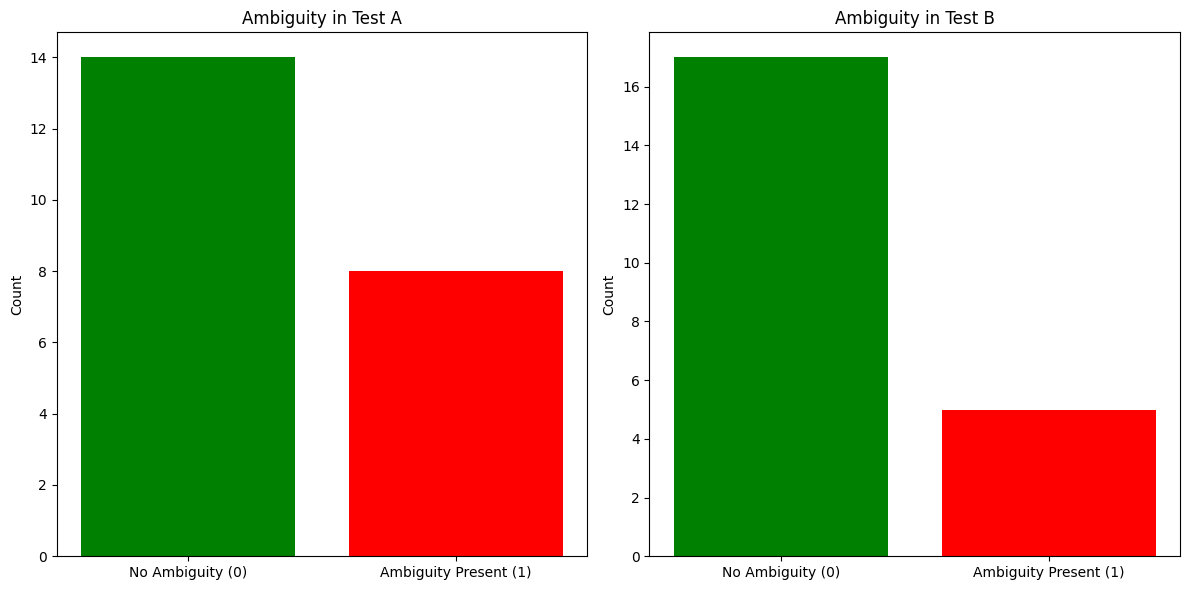

In [10]:
test_a_counts = [binomial_ambiguity_a.count(0), binomial_ambiguity_a.count(1)]
test_b_counts = [binomial_ambiguity_b.count(0), binomial_ambiguity_b.count(1)]

# Plot for Test A and Test B
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar([0, 1], test_a_counts, color=['green', 'red'])
axes[0].set_title('Ambiguity in Test A')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Ambiguity (0)', 'Ambiguity Present (1)'])
axes[0].set_ylabel('Count')

axes[1].bar([0, 1], test_b_counts, color=['green', 'red'])
axes[1].set_title('Ambiguity in Test B')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Ambiguity (0)', 'Ambiguity Present (1)'])
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
# Counts: [Test A 0, Test A 1], [Test B 0, Test B 1]
table = np.array([
    [binomial_ambiguity_a.count(0), binomial_ambiguity_a.count(1)],  # Test A (No Ambiguity, Ambiguity)
    [binomial_ambiguity_b.count(0), binomial_ambiguity_b.count(1)]   # Test B (No Ambiguity, Ambiguity)
])

# Perform Chi-Square Test
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(table)
print("Chi-Square Test p-value:", p_value_chi2)


Chi-Square Test p-value: 0.5087076194607042
